# Matemática II Biología, 2024 cuat. 1, trabajo práctico

## Apellidos y nombres de los integrantes del grupo.
### Integrante 1:
### Integrante 2:
### Integrante 3:

- ### **Los grupos deben ser de exactamente 3 integrantes**.
- ### Se entrega por el campus: una **única entrega**, algún integrante del grupo.
- ### **No se reciben entregas por otro medio que no sea el campus**.
- ### Fecha límite de entrega: Lunes 10/Junio/2024 23:59 h (GMT-3).
- ### Para aprobar la materia es condición necesaria aprobar este TP.
- ### **De considerarse necesario se citarán a los integrantes del grupo para que realicen una defensa individual de la entrega.**
- ### El recuperatorio de este TP será después del 2do. Parcial.

---
---
## Glosario:
- TDF: transformada discreta de Fourier.
- TDFI: transformada discreta de Fourier inversa (o antitransformada).
- Dominio del tiempo: la variable independiente (eje horizontal) es el tiempo.
- Dominio de las frecuencias: la variable independiente (eje horizontal) es la frecuencia.
- Frecuencia de muestreo: cantidad de muestras por unidad de tiempo.
- Paso temporal: distancia entre dos tiempos consecutivos de muestreo.
- Patito de goma:
    - https://en.wikipedia.org/wiki/Rubber_duck_debugging
    - https://rubberduckdebugging.com/

---
---

## Parte 1: filtrar frecuencias.

### A) Caso artificial.
El objetivo de este ítem es entender las ideas para poder realizar e interpretar mejor el caso real.

1. Levantar el archivo `artificial.wav`. Si tiene más de un canal, promediarlos y trabajar con el promedio de aquí en adelante.
1. Graficar en el dominio del tiempo.
1. Argumentar cómo, a partir del gráfico, se ve que hay dos rangos de frecuencias involucradas: altas y bajas.
1. Realizar la TDF de los datos y graficar frecuencias vs. amplitudes. Relacionar lo obtenido con el ítem anterior.
1. Definir un filtro para quitar las frecuencias bajas, y filtrar (en el dominio de las frecuencias). Graficar frecuencias vs. amplitudes luego de haber aplicado el filtro y argumentar qué está sucediendo.
1. Aplicar TDFI al resultado del ítem anterior y graficar en el dominio del tiempo. Comparar con el original y argumentar el impacto del filtro.
1. Repetir los últimos 2 ítems para las frecuencias altas.

### B) Caso real.


1. Escuchar el archivo `concierto.wav`. ¿Qué simpáticos animalitos identifica?
1. Levantar el archivo `concierto.wav`. Si tiene más de un canal, promediarlos y trabajar con el promedio de aquí en adelante.
1. Graficar en el dominio del tiempo. ¿Pueden identificarse como en el caso $A)$ dos rangos de frecuencias involucradas: altas y bajas? (Sugerencia: luego de ver el gráfico completo tomar como límite en el eje horizontal (200000, 200100) y al eje vertical en un rango adecuado).
1. Realizar la TDF de los datos y graficar frecuencias vs. amplitudes. Relacionar lo obtenido con el ítem anterior.
1. Definir un filtro para quitar las frecuencias bajas, y filtrar (en el dominio de las frecuencias). Graficar frecuencias vs. amplitudes luego de haber aplicado el filtro y argumentar qué está sucediendo.
1. Graficar en el tiempo el ítem anterior. Comparar con el original y argumentar el impacto del filtro (Sugerencia: considerar los mismos límites utilizados en el eje horizontal anteriormente, adaptando los del eje vertical).
2. Grabar el archivo `wav` resultante (código más abajo) del ítem anterior y escucharlo. ¿Es lo que se espera?
   ```
    from scipy.io import wavfile
    
    datos_filtrados_real = np.real(datos_filtrados)
    datos_filtrados_real = np.int16(datos_filtrados_real / np.max(np.abs(datos_filtrados_real)) * 32767)
    wavfile.write('nombre_lindo_a_eleccion.wav', freq_muestreo, datos_filtrados_real)
    
   ```
1. Repetir los últimos 3 ítems para las frecuencias altas.

---
## Parte 2: filtrar amplitudes.

1. Escuchar el archivo `misterio.wav` y sentir el misterio.
1. Levantar el archivo `misterio.wav`. Si tiene más de un canal, promediarlos y trabajar con el promedio de aquí en adelante.
1. Graficar en el dominio del tiempo. ¿Puede identificar algún patrón de ruido?
1. Realizar la TDF de los datos y graficar frecuencias vs. amplitudes. ¿Puede relacionar lo obtenido con el ítem anterior?
1. Definir un filtro para frecuencias según su amplitud para eliminar ruido.  Graficar frecuencias vs. amplitudes luego de haber aplicado el filtro y argumentar qué está sucediendo.
1. Graficar en el tiempo el ítem anterior. Comparar con el original y argumentar el impacto del filtro.
2. Grabar el archivo `wav` resultante del ítem anterior y escucharlo. ¿Es lo que se espera?

---
## Parte 3: conclusiones finales.
Escriba aquí sus **conclusiones** finales luego de haber **resuelto y analizado las partes 1 y 2, y haberlas comparado.**

In [ ]:
# Escucha a tu niñe interior: la comida va aquí.



In [ ]:
import numpy as np #para manejar arreglos
from matplotlib import pyplot as plt #para graficar

from numpy.fft import fft, fftfreq, ifft
# https://numpy.org/doc/stable/reference/routines.fft.html
# fft calcula la transformada
# fftfreq calcula las (posibles) frecuencias involucradas

from scipy.io import wavfile #leer archivos de audio wav

from scipy.integrate import solve_ivp
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

plt.rcParams["figure.figsize"] = (10,5) #tamaño de los gráficos: ancho x alto

In [ ]:
#2 - levanto el archivo y averiguo la cantidad de canales que lo componen

[freq_muestreo3, datos3] = wavfile.read('misterio.wav', 'r')
print(freq_muestreo)
print(np.shape(datos))

2000
(4000,)


Como el tamaño del array _datos_ es 4000 x 1 el sonido es mono y puedo trabajar con los datos tal como vienen dados.



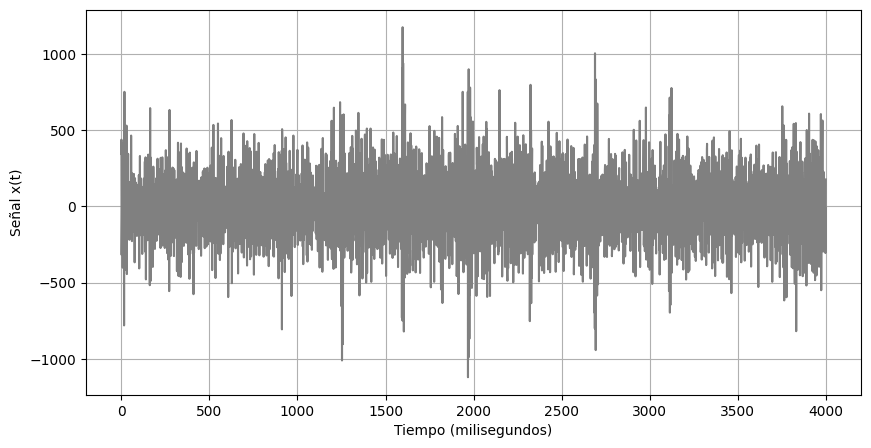

In [ ]:
#3 - grafico datos en el dominio del tiempo

plt.plot(datos3,color='gray')
plt.xlabel("Tiempo (milisegundos)")
plt.ylabel("Señal x(t)")
plt.grid(True)

Sí, puede identificarse un patrón de ruido. Hay un rango de amplitudes de módulo menor a 250 que pareciera seguir un patrón y luego picos que sobresalen de ese intervalo. Esos picos podrían constituir el ruido que se identifica al escuchar el audio y que se superpone con un sonido más leve (menor volumen) que se destaca de fondo.
A priori voy a decir que ese sonido pareciera ser la tecla de algún piano, cuando lo filtre veré de qué se trata.

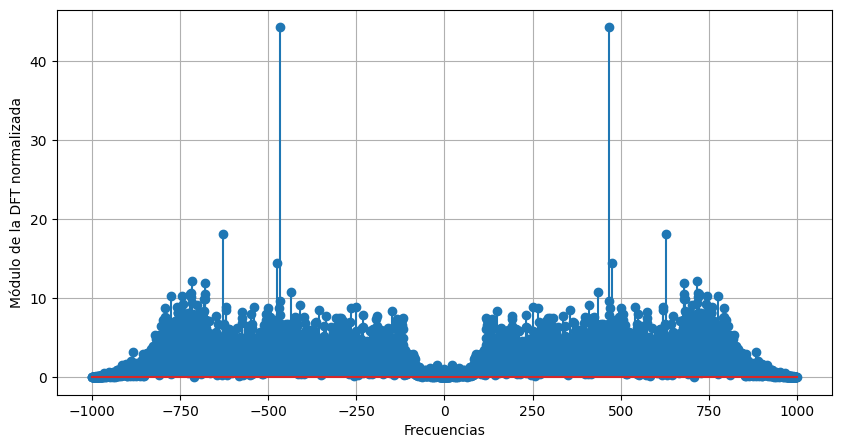

In [ ]:
#4 - realizo la DTF de los datos y grafico frecuencias vs. amplitudes.

coefs_fourier3 = fft(datos3)

cantidad_muestras3 = len(datos3)
paso_temporal3 = 1/freq_muestreo3
frecuencias3 = fftfreq(cantidad_muestras3, d=paso_temporal3)

plt.stem(frecuencias3, abs(coefs_fourier3)/cantidad_muestras3)
plt.xlabel('Frecuencias')
plt.ylabel('Módulo de la DFT normalizada')
plt.grid(True)

Aquí se verifica lo anterior. Se observan tres o cuatro frecuencias que destacan sobre el resto por su mayor amplitud y muchas frecuencias bajas agrupadas unas encima de la otra. Estas últimas, de amplitudes menores o iguales a 12 aproximadamente, son las que constituyen el ruido que se visualiza en el dominio del tiempo.

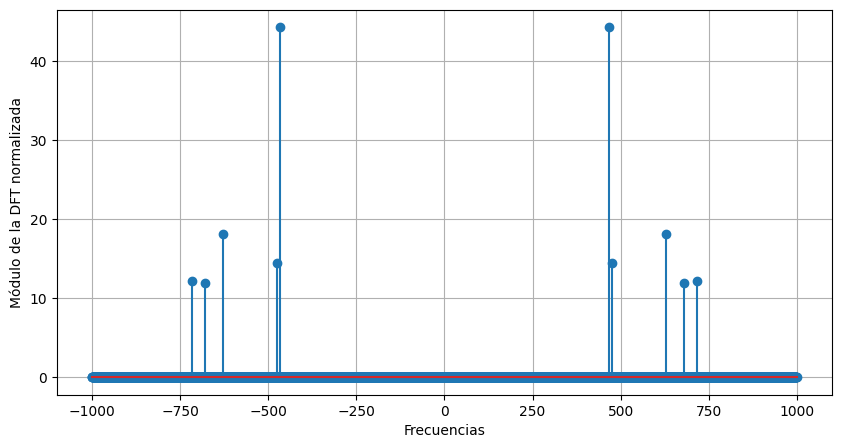

In [ ]:
#5 - defino un filtro por amplitudes y grafico luego de haberlo aplicado

def filtro_por_amplitud(frecuencias,coefs_fourier):
  filtro3 = np.ones_like(frecuencias)                                            #vector de todos 1 de tamaño igual a frecuencias
  for i in range(0,len(frecuencias),1):                                         #recorro elemento a elemento del array frecuencias
    amplitud = abs(coefs_fourier[i])/cantidad_muestras                          #determino la amplitud normalizada de cada elemento de frecuencias
    if amplitud <= 11:                                                          #elijo un criterio de selección, en este caso usamos amplitudes < o = que 11
      filtro3[i] = 0                                                             #pongo 0 en las posiciones del vector de 1 que verifican el criterio de selección
  return filtro3

#ejecuto la función que acabo de definir
filtro3 = filtro_por_amplitud(frecuencias, coefs_fourier)

#multiplico lugar a lugar: donde el filtro tiene 1 queda igual, donde tiene 0 se hace 0
coefs_fourier_filtrados3 = coefs_fourier3*filtro3

#vuevlo a graficar frecuencias vs. amplitudes para ver si el filtro funcionó
plt.stem(frecuencias3, abs(coefs_fourier_filtrados3)/cantidad_muestras3 )
plt.xlabel('Frecuencias')
plt.ylabel('Módulo de la DFT normalizada')
plt.grid(True)

Por cómo planteamos la función filtro, eliminamos las frecuencias cuya amplitud valía menos que 11 pues consideramos que esas eran las que estaban generando el ruido. Esto es absolutamente arbitrario, podría establecerse cualquier criterio de selección. En cualquier caso, la función definida puede seguir siendo utilizada, simplemente se debería modificar el valor por el cual se seleccionan las amplitudes en la cuarta línea del código que define a la función filtro.

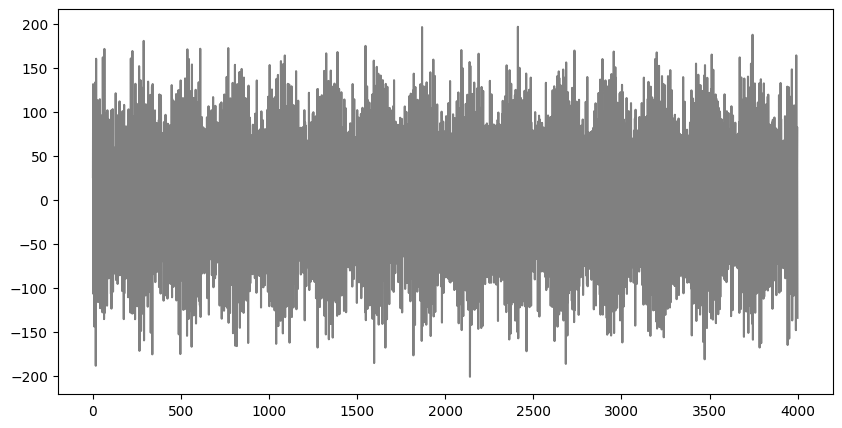

In [ ]:
#6 - grafico en el dominio del tiempo la señal de frecuencias filtradas

#aplico la IDTF para recuperar las amplitudes en función del tiempo
vals_f_recuperados3 = ifft(coefs_fourier_filtrados3)

#grafico los valores recuperados en función del tiempo
plt.plot(vals_f_recuperados3, color = 'gray')

Con las 5 amplitudes que sobrevivieron al filtro reconstruímos una señal filtrada que nos permitirá oír el sonido detrás del ruido escuchado en el audio original. Del gráfico de arriba se comprueba que las frecuencias eliminadas eran las responsables de emitir amplitudes de módulo mayor a 250 cuando graficamos los datos en función del tiempo (ítem 3).

In [ ]:
#7 - grabo el audio y lo escucho

from scipy.io import wavfile

datos_filtrados_real3 = np.real(coefs_fourier_filtrados3)
datos_filtrados_real3 = np.int16(datos_filtrados_real3 / np.max(np.abs(datos_filtrados_real3)) * 32767)
wavfile.write('La princesa y el sapo.wav', freq_muestreo3, datos_filtrados_real3)

Bueno, era el sonido del croar de un sapo, no tengo oído absoluto como Beethoven :(
